In [79]:
import os
os.getcwd()

'C:\\Users\\us16120\\Projects\\Cheminformatics\\Practicum'

In [80]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdmolops
import pandas as pd
import numpy as np

In [81]:
from rdkit.Chem import Descriptors
from rdkit.Chem import inchi
from rdkit.Chem import MolStandardize
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor

In [82]:
from molvs import Standardizer
s = Standardizer()
from molvs import fragment
from molvs import standardize_smiles

In [83]:
df01 = pd.read_excel(open('JChemInfModel_52_655/Table S1.xls','rb'),
                       sheet_name='Training set and Test Set')
columns = ['Data Set', 'Appliation Domain (ID: In Domain, OD: Out of Domain)']
df01.drop(columns, inplace=True, axis=1)
df01 = df01.rename(columns={'Experimental Labels': 'EndPt'})

In [84]:
df01.shape

(1604, 3)

In [85]:
df01.head()

,CASRN,SMILES,EndPt
0,50-00-0,C=O,RB
1,75-07-0,CC=O,RB
2,302-01-2,NN,NRB
3,60-34-4,CNN,NRB
4,79-19-6,NNC(=S)N,NRB


In [86]:
df02 = pd.read_excel(open('JChemInfModel_52_655/Table S1.xls','rb'),
                       sheet_name='817 compounds with BOD% Value')
def EndPt (row):
   if row['BOD%'] >= 60.0 :
      return 'RB'
   return 'NRB'
df02['EndPt'] = df02.apply (lambda row: EndPt(row), axis=1)
df02beta = df02[['CASRN', 'SMILES', 'EndPt']]

In [87]:
df02beta.shape

(817, 3)

In [88]:
df02beta.head()

,CASRN,SMILES,EndPt
0,25512-42-9,Clc1ccc(cc1Cl)c2ccccc2,NRB
1,26601-64-9,Clc1cccc(c1)c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl,NRB
2,2051-24-3,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl,NRB
3,12002-48-1,Clc1cc(Cl)cc(Cl)c1,NRB
4,70776-03-3,Clc1c(Cl)c(Cl)c2ccccc2c1Cl,NRB


In [89]:
df03 = pd.read_excel(open('JCIM_53_867/MansouriData.xlsx','rb'),
                       sheet_name='Train+Test')
df03 = df03[['CAS-RN', 'Smiles', 'Class']]
df03 = df03.rename(columns={'CAS-RN': 'CASRN', 'Smiles': 'SMILES', 'Class': 'EndPt'})

In [90]:
df03.shape

(1055, 3)

In [91]:
df03.head()

,CASRN,SMILES,EndPt
0,1120-21-4,CCCCCCCCCCC,RB
1,106-88-7,CCC1CO1,RB
2,112-50-5,CCOCCOCCOCCO,RB
3,64-18-6,OC=O,RB
4,124-17-4,CCCCOCCOCCOC(C)=O,RB


In [92]:
df04 = pd.read_excel(open('JCIM_53_867/MansouriData.xlsx','rb'),
                       sheet_name='External validation')
df04 = df04[['CAS-RN', 'Smiles', 'class']]
df04 = df04.rename(columns={'CAS-RN': 'CASRN', 'Smiles': 'SMILES', 'class': 'EndPt'})

In [93]:
df04.shape

(670, 3)

In [94]:
df04.head()

,CASRN,SMILES,EndPt
0,'16421-40-2',COc1cc(N=Nc2c(Cl)cc(cc2N(=O)=O)N(=O)=O)c(cc1N(Cc1ccccc1)CCOC(=O)C)NC(=O)C,NRB
1,'16421-41-3',COc1cc(/N=N/c2ccc(cc2[N+](=O)[O-])[N+](=O)[O-])c(cc1N(Cc1ccccc1)CCOC(=O)C)NC(=O)C,NRB
2,'16586-42-8',N#CCCN(c1ccc(c(c1)C)/N=N/c1nc2c(s1)cc(cc2)[N+](=O)[O-])CC,NRB
3,'25150-28-1',N#CCCN(c1ccc(cc1)/N=N/c1nc2c(s1)c(Cl)cc(c2)Cl)CC,NRB
4,'25176-89-0',N#CCCN(c1ccc(cc1)/N=N/c1sc2c(n1)cc(c(c2)Cl)Cl)CC,NRB


In [95]:
train_df = PandasTools.LoadSDF("OPERA/TR_RBioDeg_1197.sdf")
test_df = PandasTools.LoadSDF("OPERA/TST_RBioDeg_411.sdf")
df05 = pd.concat([train_df[['CAS', 'Canonical_QSARr', 'Ready_Biodeg']],
                 test_df[['CAS', 'Canonical_QSARr', 'Ready_Biodeg']]], ignore_index = True)
df05['Ready_Biodeg'] = pd.to_numeric(df05['Ready_Biodeg'])
def EndPtBeta (row):
   if row['Ready_Biodeg'] >= 0.5 :
      return 'RB'
   return 'NRB'
df05['EndPt'] = df05.apply (lambda row: EndPtBeta(row), axis=1)
df05 = df05.rename(columns={'CAS': 'CASRN', 'Canonical_QSARr': 'SMILES'})
df05beta = df05[['CASRN', 'SMILES', 'EndPt']]

In [96]:
df05beta.shape

(1608, 3)

In [97]:
df05beta.head()

,CASRN,SMILES,EndPt
0,50-00-0,C=O,RB
1,50-18-0,O=P1(NCCCO1)N(CCCl)CCCl,NRB
2,50-21-5,CC(O)C(O)=O,RB
3,50-30-6,OC(=O)c1c(Cl)cccc1Cl,NRB
4,50-31-7,OC(=O)c1c(Cl)c(Cl)ccc1Cl,NRB


In [98]:
df01['Source'] = 'Cheng'
df02beta['Source'] = 'Cheng'
df03['Source'] = 'Mansouri'
df04['Source'] = 'Mansouri'
df05beta['Source'] = 'OPERA'

frames = [df01, df02beta, df03, df04, df05beta]
df = pd.concat(frames, ignore_index = True)

In [99]:
df.shape

(5754, 4)

In [100]:
df.sample(5).head()

,CASRN,SMILES,EndPt,Source
2277,3347-22-6,O=C1C2=C(SC(=C(S2)C#N)C#N)C(=O)c3ccccc13,NRB,Cheng
2943,51-52-5,CCCC1=CC(=O)NC(=S)N1,NRB,Mansouri
3483,'23355-64-8',OCCN(c1ccc(c(c1)Cl)/N=N/c1c(Cl)cc(cc1Cl)[N+](=O)[O-])CCO,NRB,Mansouri
2539,7360-38-5,CCCCC(CC)C(=O)OCC(COC(=O)C(CC)CCCC)OC(=O)C(CC)CCCC,RB,Mansouri
4537,111-46-6,OCCOCCO,RB,OPERA


In [101]:
for i in range(len(df)):
    df.at[i, 'molecule'] = Chem.MolFromSmiles(df.loc[i, 'SMILES'])
    parentStd = standardize_smiles(df.loc[i, 'SMILES'])
    df.at[i, 'std_mol'] = Chem.MolFromSmiles(parentStd)
    # mols = rdmolops.GetMolFrags(df.at[i, 'std_mol'], asMols = True)
    # mol = max(mols, default=df.at[i, 'std_mol'], key=lambda m: m.GetNumAtoms())
    # df.at[i, 'lgstFrag'] = mol
    df.at[i, 'InChI'] = inchi.MolToInchi(df.at[i, 'std_mol'])

,CASRN,SMILES,EndPt,Source,molecule,std_mol,InChI
1626,123-91-1,C1COCCO1,NRB,Cheng,,,InChI=1S/C4H8O2/c1-2-6-4-3-5-1/h1-4H2
3795,'47458-32-2',CCCCCCCCCCCCCCCCCCC1CC(=O)OC1=O,NRB,Mansouri,,,"InChI=1S/C22H40O3/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-20-19-21(23)25-22(20)24/h20H,2-19H2,1H3"
3536,'2134-15-8',Oc1c(Br)cc2c(c1Br)Oc1c(C32OC(=O)c2c3c(Cl)c(Cl)c(c2Cl)Cl)cc(c(c1Br)O)Br,NRB,Mansouri,,,"InChI=1S/C20H4Br4Cl4O5/c21-5-1-3-17(9(23)15(5)29)32-18-4(2-6(22)16(30)10(18)24)20(3)8-7(19(31)33-20)11(25)13(27)14(28)12(8)26/h1-2,29-30H"
4512,109-89-7,CCNCC,RB,OPERA,,,"InChI=1S/C4H11N/c1-3-5-4-2/h5H,3-4H2,1-2H3"
4710,504-03-0,CC1CCCC(C)N1,NRB,OPERA,,,"InChI=1S/C7H15N/c1-6-4-3-5-7(2)8-6/h6-8H,3-5H2,1-2H3"

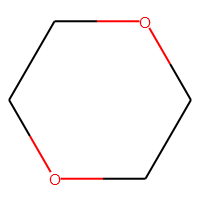
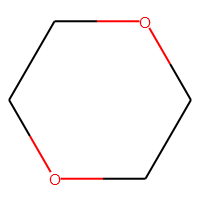
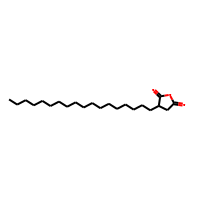
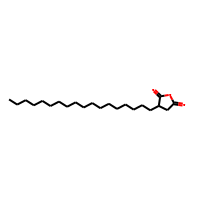
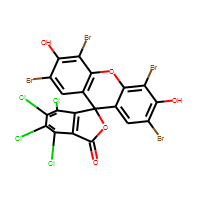
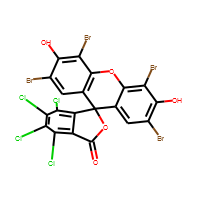
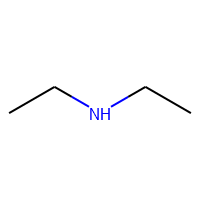
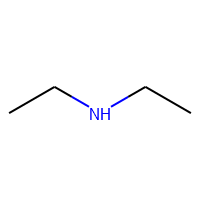
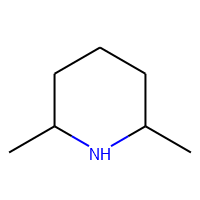
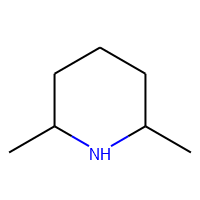

In [102]:
df.sample(5).head()

In [103]:
# replicates
ids = df['SMILES']
df_dup = df[ids.isin(ids[ids.duplicated()])].sort_values('SMILES')

In [105]:
df_dup.shape

(4341, 7)

,CASRN,SMILES,EndPt,Source,molecule,std_mol,InChI
2800,98-81-7,BrC(=C)c1ccccc1,NRB,Mansouri,,,"InChI=1S/C8H7Br/c1-7(9)8-5-3-2-4-6-8/h2-6H,1H2"
1853,98-81-7,BrC(=C)c1ccccc1,NRB,Cheng,,,"InChI=1S/C8H7Br/c1-7(9)8-5-3-2-4-6-8/h2-6H,1H2"
1210,98-81-7,BrC(=C)c1ccccc1,NRB,Cheng,,,"InChI=1S/C8H7Br/c1-7(9)8-5-3-2-4-6-8/h2-6H,1H2"
4256,79-27-6,BrC(Br)C(Br)Br,NRB,OPERA,,,InChI=1S/C2H2Br4/c3-1(4)2(5)6/h1-2H
556,79-27-6,BrC(Br)C(Br)Br,NRB,Cheng,,,InChI=1S/C2H2Br4/c3-1(4)2(5)6/h1-2H

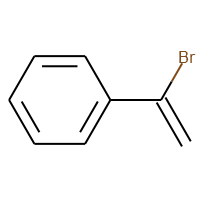
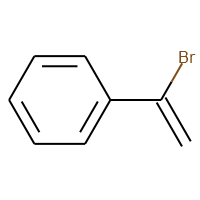
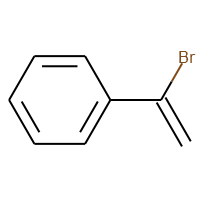
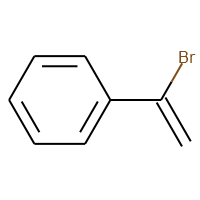
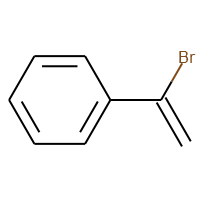
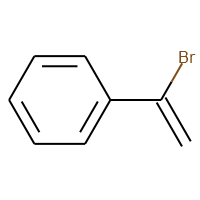
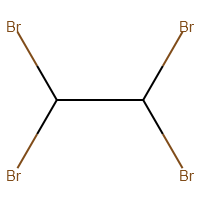
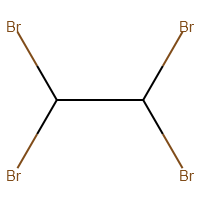
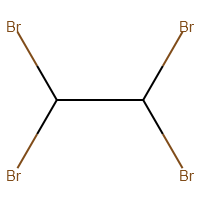
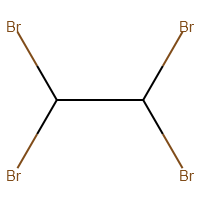

In [104]:
df_dup.head()